In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
import operator
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226


In [4]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7247,7247,7249,7252,7253,7255,7260,7262,7266,7268
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2841,2849,2855,2863,2870,2874,2880,2888,2893,2902
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5875,5878,5881,5883,5886,5890,5894,5899,5904,5907
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1678,1682,1685,1693,1695,1697,1701,1702,1703,1705


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/19/21', '10/20/21', '10/21/21', '10/22/21', '10/23/21', '10/24/21',
       '10/25/21', '10/26/21', '10/27/21', '10/28/21'],
      dtype='object', length=650)

In [7]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,0,0,0,0,0,0,0,0,0,0,...,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166
1,0,0,0,0,0,0,0,0,0,0,...,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873
2,0,0,0,0,0,0,0,0,0,0,...,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160
3,0,0,0,0,0,0,0,0,0,0,...,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505
4,0,0,0,0,0,0,0,0,0,0,...,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226


In [8]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
230,0,1,3,3,4,5,7,7,10,13,...,154725,158587,162026,165663,169261,172644,175818,179095,184419,187851


In [9]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,0,0,0,0,0,0,0,0,0,0,...,7247,7247,7249,7252,7253,7255,7260,7262,7266,7268
1,0,0,0,0,0,0,0,0,0,0,...,2841,2849,2855,2863,2870,2874,2880,2888,2893,2902
2,0,0,0,0,0,0,0,0,0,0,...,5875,5878,5881,5883,5886,5890,5894,5899,5904,5907
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1678,1682,1685,1693,1695,1697,1701,1702,1703,1705


In [10]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [12]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(245518652,
 4981186,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479663,
  542525,
  607435,
  677100,
  734000,
  799279,
  876098,
  959098,
  1042125,
  1126354,
  1185448,
  1256304,
  1330214,
  1399820,
  1483141,
  1570148,
  1655435,
  1729825,
  1849397,
  1920450,
  2004357,
  2082578,
  2178264,
  2266302,
  2343474,
  2420249,
  2495798,
  2571854,
  2653236,
  2737234,
  2821349,
  2903700,
  2975267,
  3045514,
  3121393,
  3198418,
  3281836,
  

In [13]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [14]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


In [15]:
singapore_cases

array([[     0],
       [     1],
       [     3],
       [     3],
       [     4],
       [     5],
       [     7],
       [     7],
       [    10],
       [    13],
       [    16],
       [    18],
       [    18],
       [    24],
       [    28],
       [    28],
       [    30],
       [    33],
       [    40],
       [    45],
       [    47],
       [    50],
       [    58],
       [    67],
       [    72],
       [    75],
       [    77],
       [    81],
       [    84],
       [    84],
       [    85],
       [    85],
       [    89],
       [    89],
       [    91],
       [    93],
       [    93],
       [    93],
       [   102],
       [   106],
       [   108],
       [   110],
       [   110],
       [   117],
       [   130],
       [   138],
       [   150],
       [   150],
       [   160],
       [   178],
       [   178],
       [   200],
       [   212],
       [   226],
       [   243],
       [   266],
       [   313],
       [   345],
       [   385

In [16]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [18]:
# visualisation with the latest data

latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      156166
 1      183873
 2      206160
 3       15505
 4       64226
         ...  
 274    905477
 275    452642
 276      9751
 277    209672
 278    132880
 Name: 10/28/21, Length: 279, dtype: int64,
 0       7268
 1       2902
 2       5907
 3        130
 4       1705
        ...  
 274    21910
 275     4657
 276     1874
 277     3660
 278     4675
 Name: 10/28/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 10/28/21, Length: 264, dtype: int64)

In [19]:
# create a list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [21]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 45826523 cases
India: 34246157 cases
Brazil: 21781436 cases
United Kingdom: 8978443 cases
Russia: 8260045 cases
Turkey: 7961505 cases
France: 7248285 cases
Iran: 5899509 cases
Argentina: 5286074 cases
Spain: 5008887 cases
Colombia: 4997444 cases
Italy: 4757231 cases
Germany: 4553744 cases
Indonesia: 4242532 cases
Mexico: 3798286 cases
Poland: 2998891 cases
Ukraine: 2984456 cases
South Africa: 2921114 cases
Philippines: 2768849 cases
Malaysia: 2454749 cases
Peru: 2199036 cases
Netherlands: 2148383 cases
Iraq: 2052123 cases
Thailand: 1884973 cases
Czechia: 1747701 cases
Japan: 1718764 cases
Canada: 1717762 cases
Chile: 1688454 cases
Romania: 1616027 cases
Bangladesh: 1568857 cases
Belgium: 1351913 cases
Israel: 1326171 cases
Pakistan: 1271687 cases
Sweden: 1170422 cases
Serbia: 1125602 cases
Portugal: 1088133 cases
Kazakhstan: 1015439 cases
Cuba: 949747 cases
Morocco: 945504 cases
Vietnam: 905477 cases
Switzerland: 870837 cases
Hungary: 859378 ca

In [22]:
# Find the list of unique provinces

# remove NaN
# unique_provinces =  list(confirmed_cases['Province/State'].unique())[1:]
unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [23]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for case in no_cases:
    unique_provinces.remove(case)

In [24]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 1759 cases
New South Wales: 74887 cases
Northern Territory: 225 cases
Queensland: 2089 cases
South Australia: 918 cases
Tasmania: 237 cases
Victoria: 86563 cases
Western Australia: 1112 cases
Alberta: 322386 cases
British Columbia: 204330 cases
Grand Princess: 13 cases
Manitoba: 63212 cases
New Brunswick: 6332 cases
Newfoundland and Labrador: 1984 cases
Northwest Territories: 1860 cases
Nova Scotia: 7328 cases
Nunavut: 674 cases
Ontario: 607045 cases
Prince Edward Island: 315 cases
Quebec: 424290 cases
Repatriated Travellers: 13 cases
Saskatchewan: 77067 cases
Yukon: 913 cases
Anhui: 1008 cases
Beijing: 1157 cases
Chongqing: 603 cases
Fujian: 1302 cases
Gansu: 275 cases
Guangdong: 3221 cases
Guangxi: 334 cases
Guizhou: 158 cases
Hainan: 190 cases
Hebei: 1321 cases
Heilongjiang: 1723 cases
Henan: 1558 cases
Hong Kong: 12337 cases
Hubei: 68306 cases
Hunan: 1197 cases
Inner Mongolia: 558 cases
Jiangsu: 1600 cases
Jiangxi: 937 cases
Jilin: 577 cases
Liaoning: 

In [25]:
# handling nan values if there is any

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

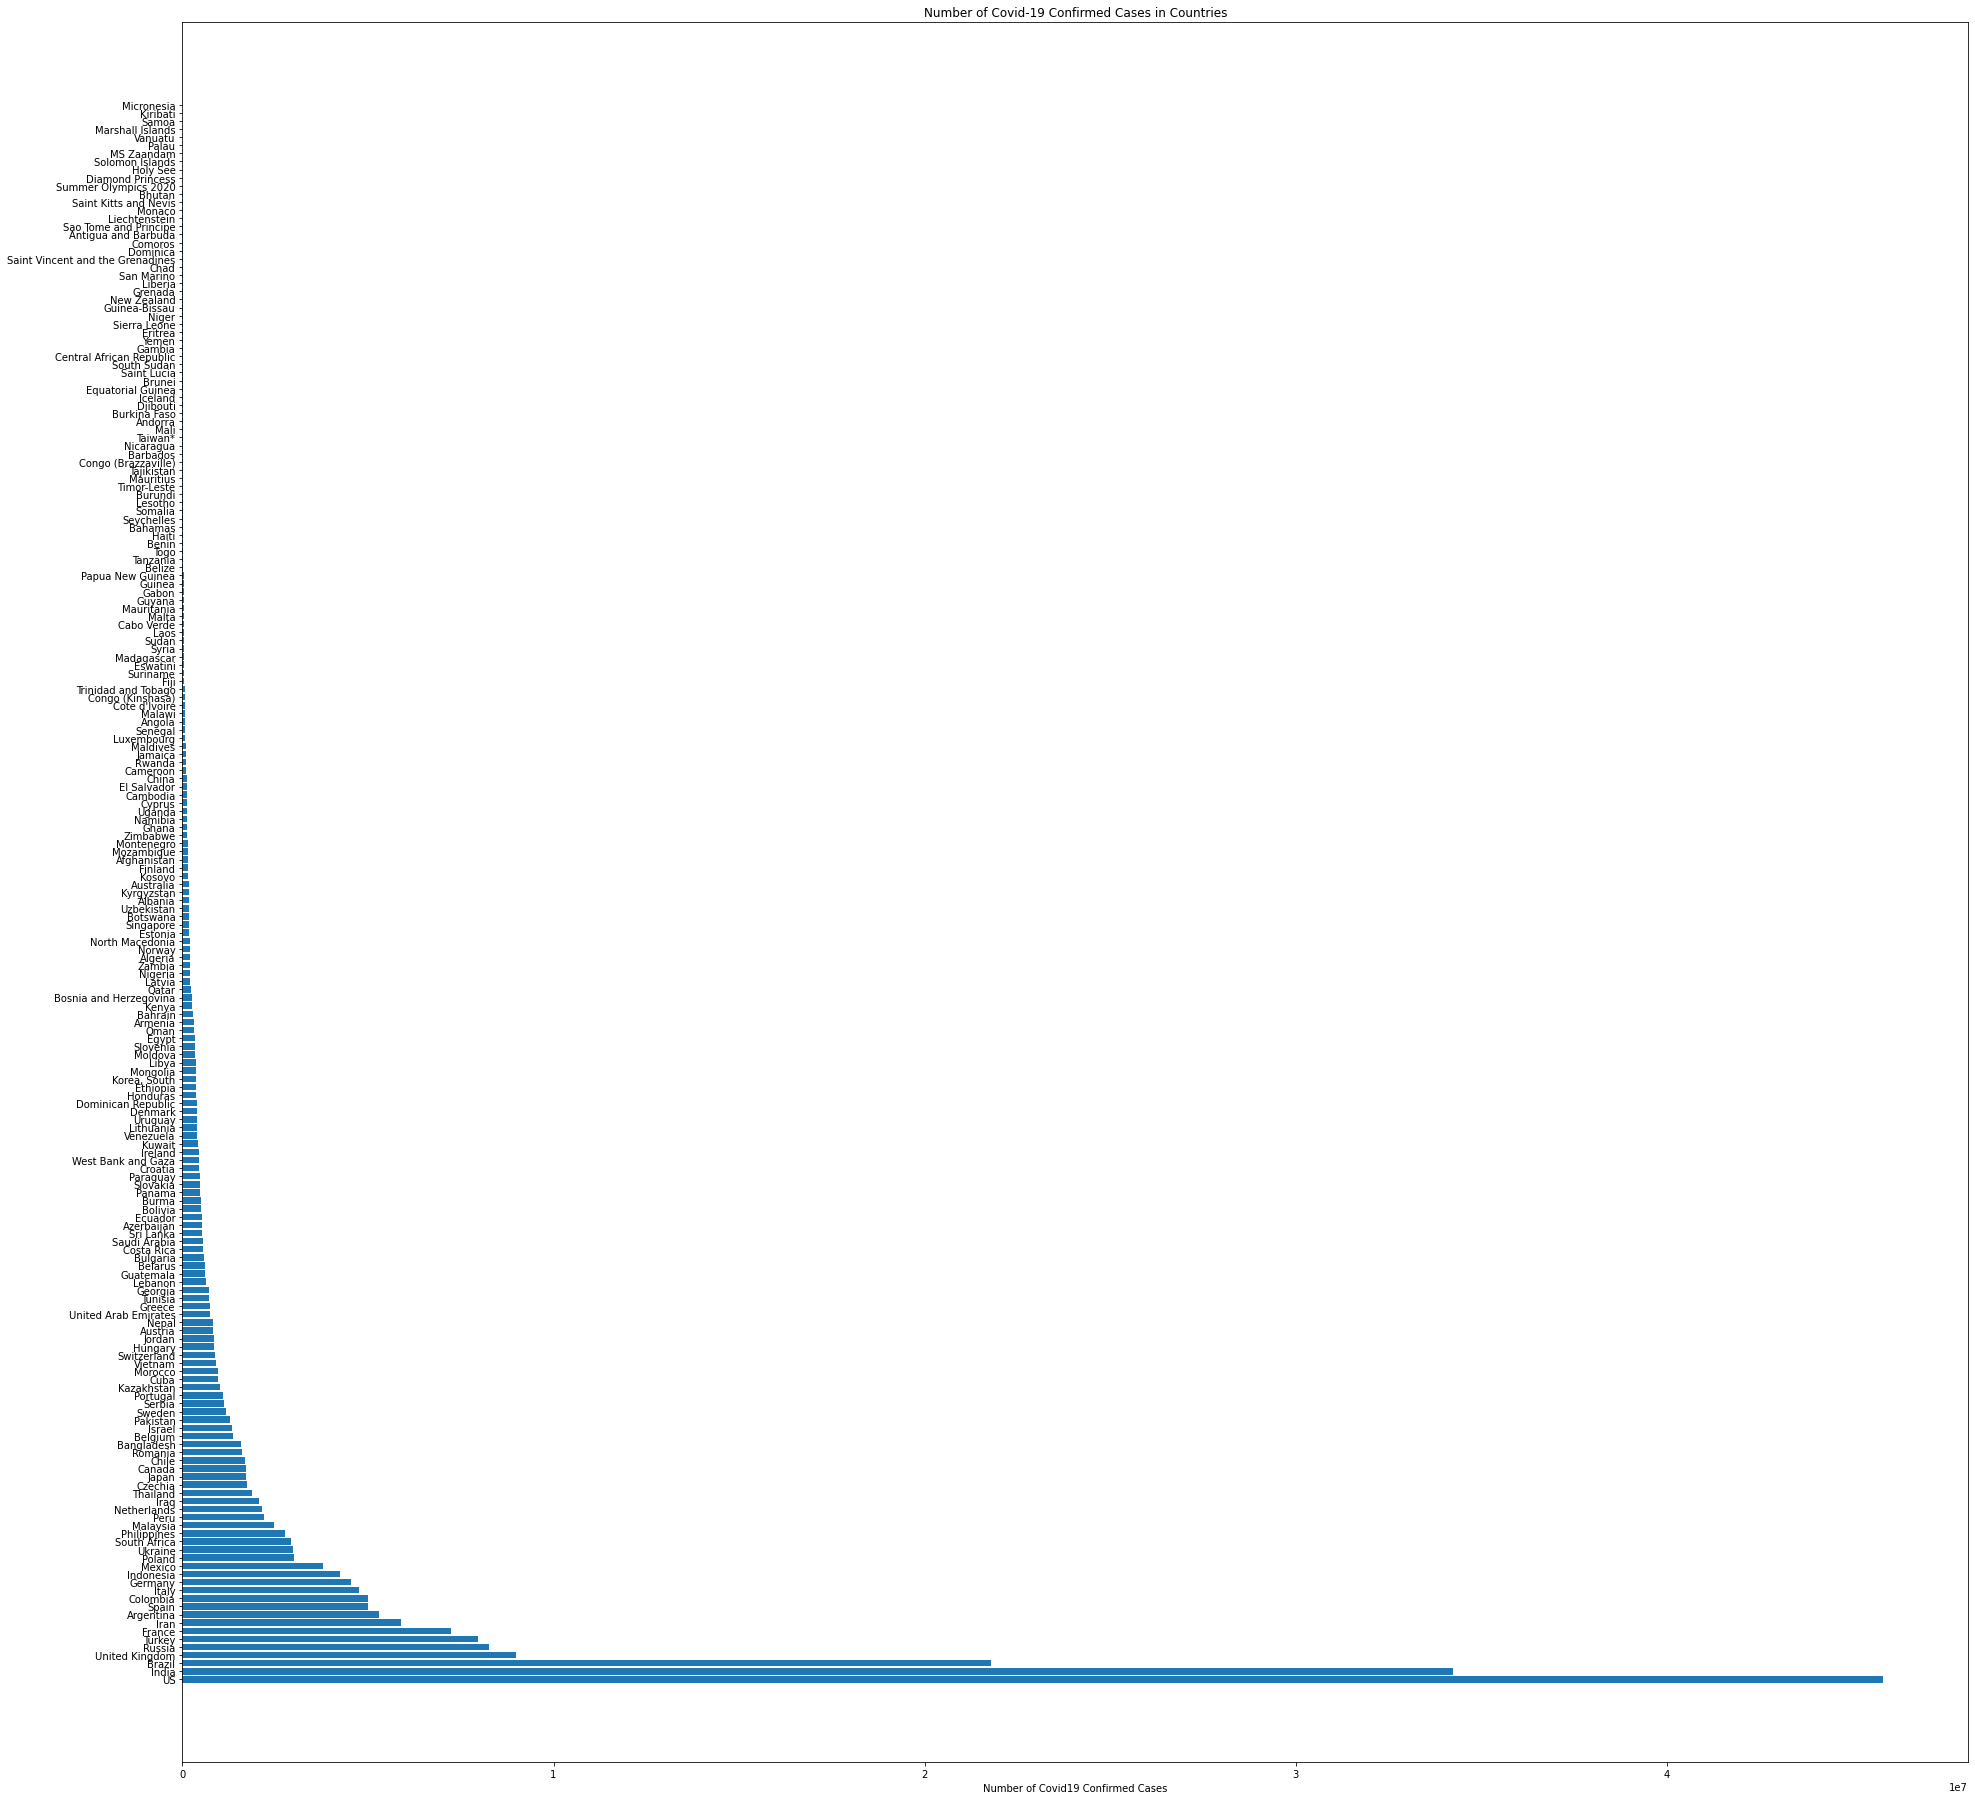

In [26]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [27]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

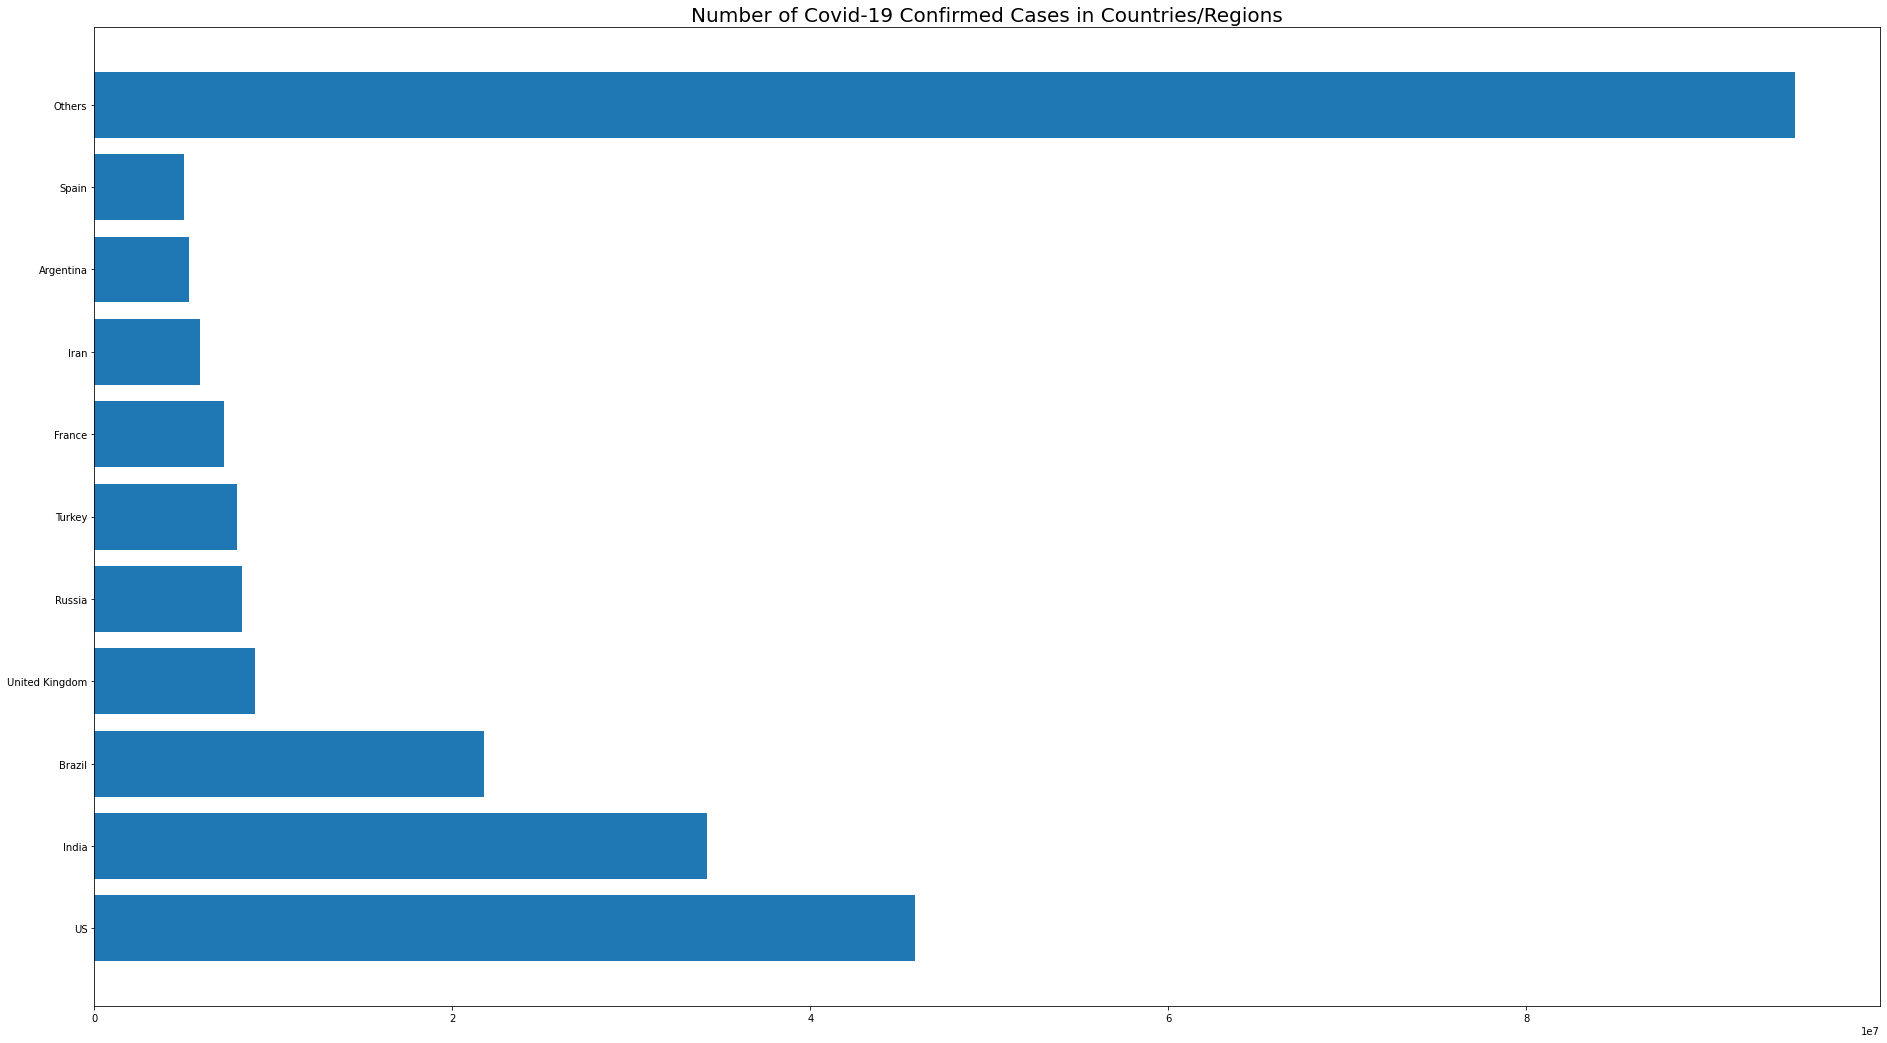

In [28]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

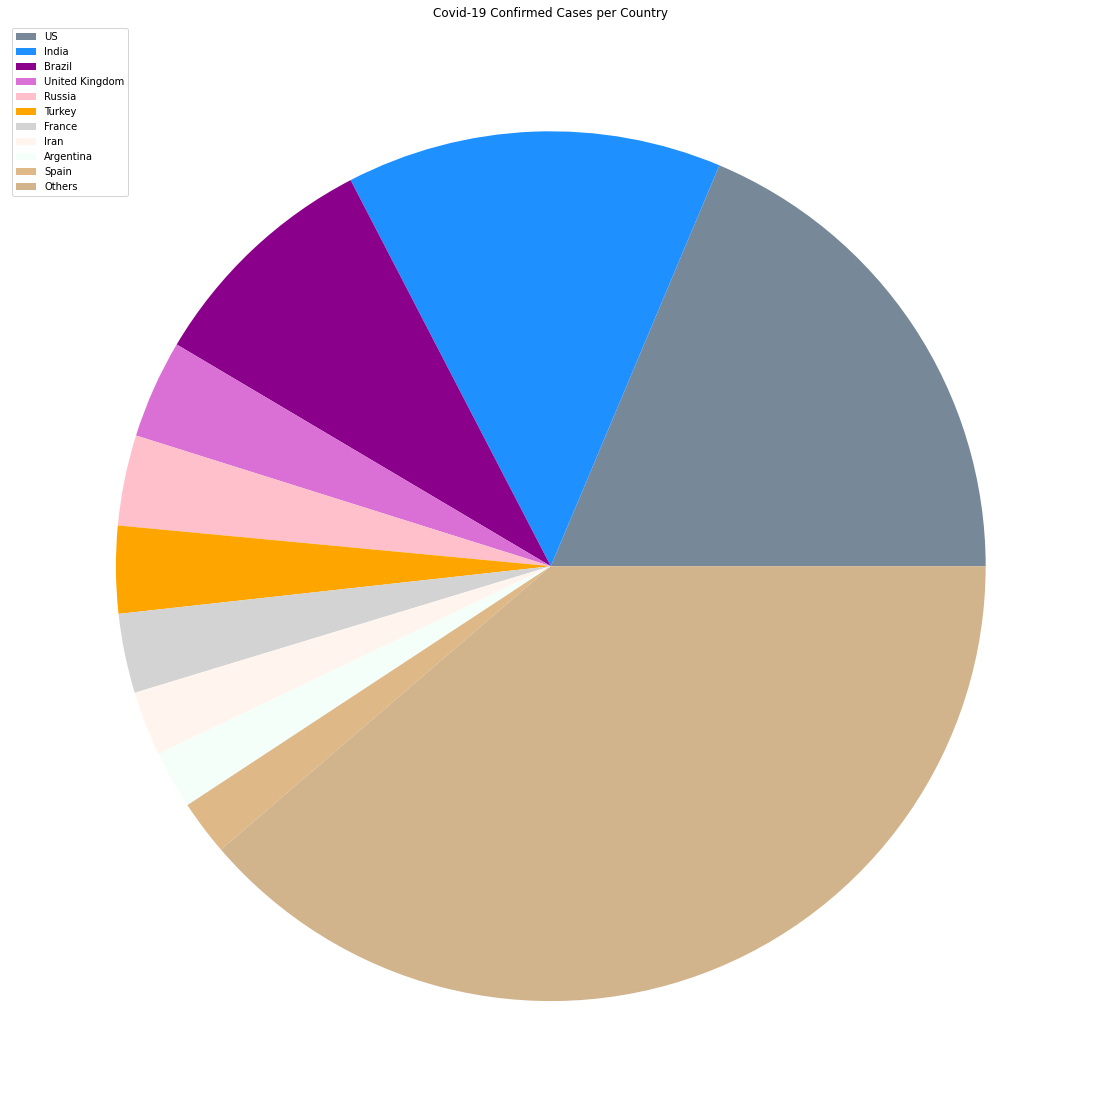

In [29]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

**Global Predictions**

In [30]:
# split data into train/test for global

start = datetime.date(2021, 1, 1)
today = datetime.date.today()
diff = today - start
days_to_skip = future_forecast[-1][0] - (100 or diff.days)
# X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.20, random_state=42)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.20, random_state=42)

In [31]:
svm = SVR()
svm.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm.predict(future_forecast)

MAE: 68816838.51702945
MSE: 6166958657134574.0
RMSE: 78529985.7196891
R-squared score for train: -0.025245395858105146
Adjusted R-squared score for train: -0.026837391814406697
R-squared score for test: -0.0034434905405831273
Adjusted R-squared score for test: -0.005001632606639772
Cross Validation Score: -675.2384


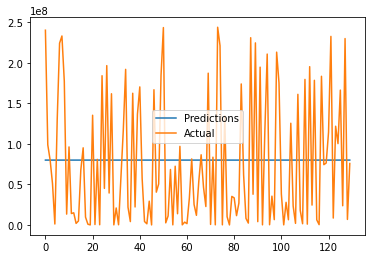

In [32]:
svm_test_pred = svm.predict(X_test_confirmed)
plt.plot(svm_test_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
# train_adjusted_r2 = 1 - (1-svm.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# test_adjusted_r2 = 1 - (1-svm.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
train_adjusted_r2 = 1 - (1-svm.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-svm.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, svm_test_pred))
print('MSE:', mean_squared_error(y_test_confirmed, svm_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, svm_test_pred)))
print('R-squared score for train:', svm.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', svm.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
# print('Cross Validation Score:', round(np.mean(cross_val_score(svm_confirmed, days_since_1_22[days_to_skip:], world_cases[days_to_skip:].ravel(), cv=5)), 4))
print('Cross Validation Score:', round(np.mean(cross_val_score(svm, days_since_1_22, world_cases.ravel(), cv=5)), 4))

In [33]:
# Building the SVM model

# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [34]:
# svm_search.best_params_

In [35]:
svm_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, C=0.01)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 15360776.551026598
MSE: 351759704239170.06
RMSE: 18755258.042457588
R-squared score for train: 0.9351988508218119
Adjusted R-squared score for train: 0.9350982279193613
R-squared score for test: 0.9427641719237209
Adjusted R-squared score for test: 0.9426752964142856
Cross Validation Score: -45.7891


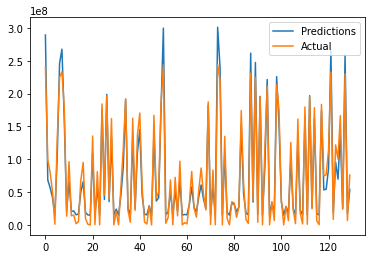

In [36]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
# train_adjusted_r2 = 1 - (1-svm_confirmed.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# test_adjusted_r2 = 1 - (1-svm_confirmed.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
train_adjusted_r2 = 1 - (1-svm_confirmed.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-svm_confirmed.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, svm_test_pred))
print('MSE:', mean_squared_error(y_test_confirmed, svm_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, svm_test_pred)))
print('R-squared score for train:', svm_confirmed.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', svm_confirmed.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
# print('Cross Validation Score:', round(np.mean(cross_val_score(svm_confirmed, days_since_1_22[days_to_skip:], world_cases[days_to_skip:].ravel(), cv=5)), 4))
print('Cross Validation Score:', round(np.mean(cross_val_score(svm_confirmed, days_since_1_22, world_cases.ravel(), cv=5)), 4))

In [37]:
# Confirmed vs Predicted cases

# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'SVM predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [38]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('10/29/2021', 306441479.9725976),
 ('10/30/2021', 307797779.49709564),
 ('10/31/2021', 309158278.08797437),
 ('11/01/2021', 310522982.2353071),
 ('11/02/2021', 311891898.429117),
 ('11/03/2021', 313265033.159501),
 ('11/04/2021', 314642392.91649735),
 ('11/05/2021', 316023984.1901447),
 ('11/06/2021', 317409813.47053343),
 ('11/07/2021', 318799887.2476911)}

In [39]:
# Using Linear regression model to make predictions

linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)

MAE: 27720668.117874186
MSE: 934739713227771.4
RMSE: 30573513.262753617
R-squared score for train: 0.8684622797169208
Adjusted R-squared score for train: 0.8682580285984688
R-squared score for test: 0.8479058263990384
Adjusted R-squared score for test: 0.8476696553220183
Cross Validation Score: -31.5521


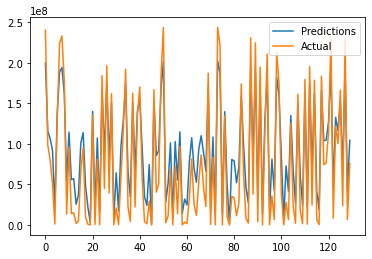

In [40]:
plt.plot(test_linear_pred, label="Predictions")
plt.plot(y_test_confirmed, label="Actual")
plt.legend(loc="best")
# train_adjusted_r2 = 1 - (1-linear_model.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# test_adjusted_r2 = 1 - (1-linear_model.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases[days_to_skip:])-1)/(len(world_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
train_adjusted_r2 = 1 - (1-linear_model.score(X_train_confirmed, y_train_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-linear_model.score(X_test_confirmed, y_test_confirmed)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
print('MAE:', mean_absolute_error(y_test_confirmed, test_linear_pred))
print('MSE:', mean_squared_error(y_test_confirmed, test_linear_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test_confirmed, test_linear_pred)))
print('R-squared score for train:', linear_model.score(X_train_confirmed, y_train_confirmed))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', linear_model.score(X_test_confirmed, y_test_confirmed))
print('Adjusted R-squared score for test:', test_adjusted_r2)
# print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model, days_since_1_22[days_to_skip:], world_cases[days_to_skip:], cv=5)), 4))
print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model, days_since_1_22, world_cases, cv=5)), 4))

In [41]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [42]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[2.03914739e+08]
 [2.04230397e+08]
 [2.04546054e+08]
 [2.04861712e+08]
 [2.05177369e+08]
 [2.05493027e+08]
 [2.05808684e+08]
 [2.06124342e+08]
 [2.06439999e+08]
 [2.06755656e+08]]


**Singapore Predictions**

In [43]:
# # split data into train/test for Singapore

# start = datetime.date(2021, 1, 1)
# today = datetime.date.today()
# diff = today - start
# days_to_skip = future_forecast[-1][0] - (100 or diff.days)
# # X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:], test_size=0.20, random_state=42)
# X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22, singapore_cases, test_size=0.20, random_state=42)

In [44]:
# # play arnd with the below

# svm_sg_confirmed = SVR(kernel='poly', gamma=0.01, epsilon=1, C=0.01)
# svm_sg_confirmed.fit(X_train_sg_confirmed, y_train_sg_confirmed.ravel())
# svm_sg_pred = svm_sg_confirmed.predict(future_forecast)

In [45]:
# # check against testing data

# svm_sg_test_pred = svm_sg_confirmed.predict(X_test_sg_confirmed)
# plt.plot(svm_sg_test_pred, label="Predictions")
# plt.plot(y_test_sg_confirmed, label="Actual")
# plt.legend(loc="best")
# # train_adjusted_r2 = 1 - (1-svm_sg_confirmed.score(X_train_sg_confirmed, y_train_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# # test_adjusted_r2 = 1 - (1-svm_sg_confirmed.score(X_test_sg_confirmed, y_test_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# train_adjusted_r2 = 1 - (1-svm_sg_confirmed.score(X_train_sg_confirmed, y_train_sg_confirmed)) * (len(singapore_cases)-1)/(len(singapore_cases)-days_since_1_22.shape[1]-1)
# test_adjusted_r2 = 1 - (1-svm_sg_confirmed.score(X_test_sg_confirmed, y_test_sg_confirmed)) * (len(singapore_cases)-1)/(len(singapore_cases)-days_since_1_22.shape[1]-1)
# print('MAE:', mean_absolute_error(y_test_sg_confirmed, svm_sg_test_pred))
# print('MSE:', mean_squared_error(y_test_sg_confirmed, svm_sg_test_pred))
# print('RMSE:', np.sqrt(mean_squared_error(y_test_sg_confirmed, svm_sg_test_pred)))
# print('R-squared score for train:', svm_sg_confirmed.score(X_train_sg_confirmed, y_train_sg_confirmed))
# print('Adjusted R-squared score for train:', train_adjusted_r2)
# print('R-squared score for test:', svm_sg_confirmed.score(X_test_sg_confirmed, y_test_sg_confirmed))
# print('Adjusted R-squared score for test:', test_adjusted_r2)
# # print('Cross Validation Score:', round(np.mean(cross_val_score(svm_sg_confirmed, days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:].ravel(), cv=5)), 4))
# print('Cross Validation Score:', round(np.mean(cross_val_score(svm_sg_confirmed, days_since_1_22, singapore_cases.ravel(), cv=5)), 4))

In [46]:
# # Predictions for the next 10 days using SVM

# print('SVM future predictions:')
# set(zip(future_forecast_dates[-10:], svm_sg_pred[-10:]))

In [47]:
# # Using Linear regression model to make predictions

# linear_model_sg = LinearRegression(fit_intercept=False)
# linear_model_sg.fit(X_train_sg_confirmed, y_train_sg_confirmed)
# test_linear_pred_sg = linear_model_sg.predict(X_test_sg_confirmed)
# linear_pred_sg = linear_model_sg.predict(future_forecast)

In [48]:
# plt.plot(test_linear_pred_sg, label="Predictions")
# plt.plot(y_test_sg_confirmed, label="Actual")
# plt.legend(loc="best")
# # train_adjusted_r2 = 1 - (1-linear_model_sg.score(X_train_sg_confirmed, y_train_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# # test_adjusted_r2 = 1 - (1-linear_model_sg.score(X_test_sg_confirmed, y_test_sg_confirmed)) * (len(singapore_cases[days_to_skip:])-1)/(len(singapore_cases[days_to_skip:])-days_since_1_22[days_to_skip:].shape[1]-1)
# train_adjusted_r2 = 1 - (1-linear_model_sg.score(X_train_sg_confirmed, y_train_sg_confirmed)) * (len(singapore_cases)-1)/(len(singapore_cases)-days_since_1_22.shape[1]-1)
# test_adjusted_r2 = 1 - (1-linear_model_sg.score(X_test_sg_confirmed, y_test_sg_confirmed)) * (len(singapore_cases)-1)/(len(singapore_cases)-days_since_1_22.shape[1]-1)
# print('MAE:', mean_absolute_error(y_test_sg_confirmed, test_linear_pred_sg))
# print('MSE:', mean_squared_error(y_test_sg_confirmed, test_linear_pred_sg))
# print('RMSE:', np.sqrt(mean_squared_error(y_test_sg_confirmed, test_linear_pred_sg)))
# print('R-squared score for train:', linear_model_sg.score(X_train_sg_confirmed, y_train_sg_confirmed))
# print('Adjusted R-squared score for train:', train_adjusted_r2)
# print('R-squared score for test:', linear_model_sg.score(X_test_sg_confirmed, y_test_sg_confirmed))
# print('Adjusted R-squared score for test:', test_adjusted_r2)
# # print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model_sg, days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:], cv=5)), 4))
# print('Cross Validation Score:', round(np.mean(cross_val_score(linear_model_sg, days_since_1_22, singapore_cases, cv=5)), 4))

In [49]:
# # Predictions for the next 10 days using Linear Regression

# print('Linear regression future predictions:')
# print(linear_pred_sg[-10:])